In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import pickle
from tweepy import OAuthHandler
import pandas as pd

Initializing Keys

In [3]:
consumer_key="GeShTcRJXFxsZ1BkAiQr2ciPQ"
consumer_secret="tUgjSNyU7t09RSO3Az15Dx8cHCCqxwvl8acjiqp9GsYdHTXdm3"
access_token="1262097268984823808-SwP4mRN0OW0kQfhk3yDcbWGikzzmGr"
access_secret="RWAlw1sfdYaSh1W7UW9OPwfZTiEhrLzgPKtqXpX22WvA0"

In [4]:
auth= OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api= tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
args=["flipkart","amazonIN","snapdeal"]
flipkart_tweets=[]
query=args[0]
if len(args)==3:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets -filter:replies ",lang="en",result_type= "mixed").items(3000):
        flipkart_tweets.append(status.text)

amazon_tweets=[]        
query=args[1]
if len(args)==3:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets -filter:replies",lang="en",result_type= "mixed",geocode=" 21.15042,79.07835,1000km").items(3000):
        amazon_tweets.append(status.text)


snapdeal_tweets=[]        
query=args[2]
if len(args)==3:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang="en",result_type= "recent").items(3000):
        snapdeal_tweets.append(status.text)        

In [179]:
df_flipkart=pd.DataFrame(flipkart_tweets,columns=["flipkart"])
df_flipkart.head()

,flipkart
0,Designed for men who mean business.😎 The no ga...
1,They aren't going to back down!\nWatch out for...
2,Are you ready for incredible photography with ...
3,#Loot #Deal #Grab\n\nCasio Analog Watch - For ...
4,Check order id in screenshot and please resolv...


In [7]:
    df_flipkart.to_csv(r'C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Datascience ims 2\project 2\flipkart_tweets1.csv', index = False)
    df_flipkart=pd.read_csv(r'C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Datascience ims 2\project 2\flipkart_tweets1.csv')

In [8]:
import re

In [182]:
list_fkt=[]
for tweet in df_flipkart.flipkart:
    tweet= tweet.lower()
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet= re.sub(r'\W',' ',tweet)
    tweet= re.sub(r'[ய இர ந த வ ள ய ட ங க க ள வ க க ன பத ல வர ச ய]',' ',tweet)
    tweet=re.sub(r'\d',' ',tweet)
    tweet=re.sub(r'\s+[a-z]\s+',' ',tweet)
    tweet=re.sub(r"^[a-z]\s+"," ", tweet)
    tweet=tweet.strip()
    tweet=re.sub(r'\s+',' ',tweet)
    list_fkt.append(tweet)


In [183]:
import nltk
from nltk.corpus import stopwords

In [185]:
list_fkt1=[]
for i in list_fkt:
    words= nltk.word_tokenize(i)
    newwords=[word for word in words if word not in stopwords.words("english")]
    i=" ".join(newwords)
    i=i.strip()
    list_fkt1.append(i)
# print(list_fkt1)    

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid_fkt = SentimentIntensityAnalyzer()

In [186]:
sid_fkt.polarity_scores(list_fkt1[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [187]:
for i in list_fkt1:
    score=sid_fkt.polarity_scores(i)
#     print(score)

In [188]:
df_fkt= pd.DataFrame(list_fkt1)
df_fkt.columns=["tweets"]
df_fkt.head()

,tweets
0,designed men mean business gas range one fragr...
1,going back watch paraschhabra today episode
2,ready incredible photography note mp ai quad c...
3,loot deal grab casio analog watch men metallic...
4,check order id screenshot please resolve issue...


In [189]:

senti_fkt=[]
for i in df_fkt["tweets"]:
    score=sid_fkt.polarity_scores(i)
    if score['compound'] >= 0.5 : 
#         print("Positive") 
        senti_fkt.append("Positive")
  
    elif score['compound'] <= - 0.5 : 
#         print("Negative") 
        senti_fkt.append("Negative")
  
    else : 
#         print("Neutral")
        senti_fkt.append("Neutral")

   

In [190]:
print(senti_fkt[0:7])

['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive']


In [197]:
Sentiment_fkt=pd.DataFrame(senti_fkt)
Sentiment_fkt.columns=["sentiment"]
Sentiment_fkt.head(10)

,sentiment
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Neutral
5,Neutral
6,Positive
7,Neutral
8,Neutral
9,Neutral


In [198]:
Sentiment_fkt.sentiment.value_counts()

Neutral     2066
Positive     637
Negative     297
Name: sentiment, dtype: int64

In [193]:
flipkart_sentiment=pd.concat([df_fkt,Sentiment_fkt], axis=1)
flipkart_sentiment.head(7)

,tweets,sentiment
0,designed men mean business gas range one fragr...,Neutral
1,going back watch paraschhabra today episode,Neutral
2,ready incredible photography note mp ai quad c...,Neutral
3,loot deal grab casio analog watch men metallic...,Neutral
4,check order id screenshot please resolve issue...,Neutral
5,flipkartcheats flipkart consumercourt amazon f...,Neutral
6,shop evergreen polo tees dj ixi renowned shirt...,Positive


In [199]:
# This Step is done to remove those rows which only contains "" .
index_drop=flipkart_sentiment[flipkart_sentiment["tweets"]==""].index
flipkart_sentiment.drop(index_drop, inplace = True) 
flipkart_sentiment.head(10)

,tweets,sentiment
0,designed men mean business gas range one fragr...,Neutral
1,going back watch paraschhabra today episode,Neutral
2,ready incredible photography note mp ai quad c...,Neutral
3,loot deal grab casio analog watch men metallic...,Neutral
4,check order id screenshot please resolve issue...,Neutral
5,flipkartcheats flipkart consumercourt amazon f...,Neutral
6,shop evergreen polo tees dj ixi renowned shirt...,Positive
7,refund due inconvenience caused,Neutral
8,ensure flipkart account information safe reque...,Neutral
9,buy anything flipkart bcs cheat customers,Neutral


In [158]:
flipkart_sentiment.sentiment.value_counts()

Neutral     2064
Positive     637
Negative     297
Name: sentiment, dtype: int64

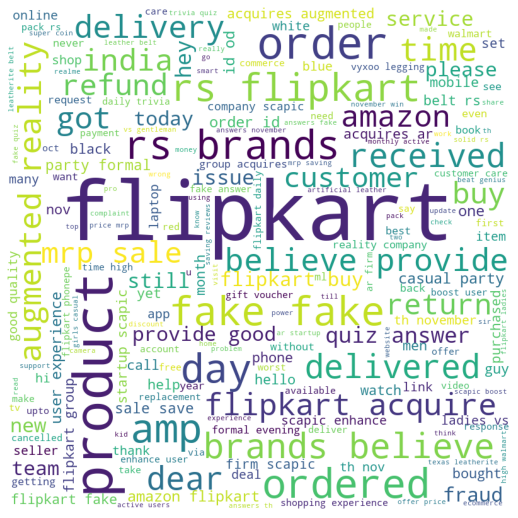

In [121]:
# WordCloud of Full (Flipkart)
from wordcloud import WordCloud, STOPWORDS 
    
comment_words = '' 
stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in flipkart_sentiment.tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

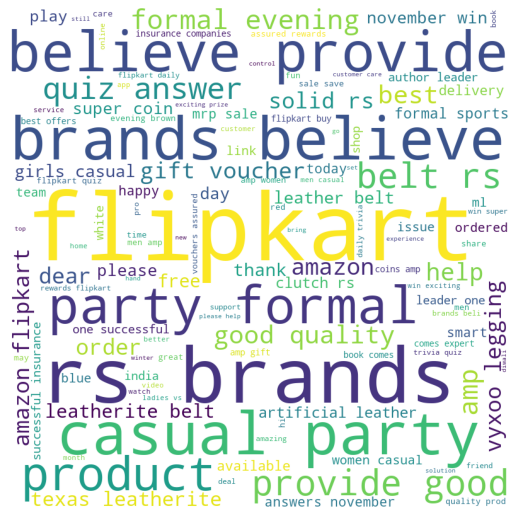

In [122]:
# WordCloud of "Positive" (Flipkart)
comment_words = '' 
   
for val in flipkart_sentiment[flipkart_sentiment.sentiment=="Positive"].tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

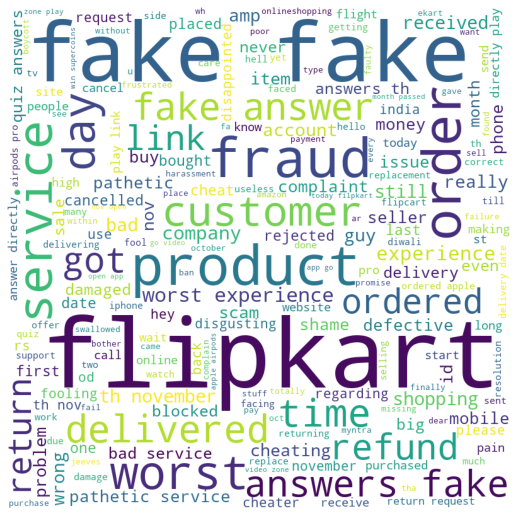

In [123]:
# WordCloud of "Negative"(Flipkart)
comment_words = '' 
  
for val in flipkart_sentiment[flipkart_sentiment.sentiment=="Negative"].tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Amazon


In [130]:
df_amazon=pd.DataFrame(amazon_tweets,columns=["amazon"])
df_amazon.to_csv(r'C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Datascience ims 2\project 2\amazon_tweets.csv', index = False)
df_amazon=pd.read_csv(r'C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Datascience ims 2\project 2\amazon_tweets.csv')

In [200]:
list_amzn=[]
for tweet in df_amazon.amazon:
    tweet= tweet.lower()
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet= re.sub(r'\W',' ',tweet)
    tweet= re.sub(r'[ய இர ந த வ ள ய ட ங க க ள வ க க ன பத ல வர ச ய]',' ',tweet)
    tweet=re.sub(r'\d',' ',tweet)
    tweet=re.sub(r'\s+[a-z]\s+',' ',tweet)
    tweet=re.sub(r"^[a-z]\s+"," ", tweet)
    tweet=tweet.strip()
    tweet=re.sub(r'\s+',' ',tweet)
    list_amzn.append(tweet)


In [201]:
import nltk
from nltk.corpus import stopwords

In [202]:
list_amzn1=[]
for i in list_amzn:
    words= nltk.word_tokenize(i)
    newwords=[x for x in words if x not in stopwords.words("english")]
    i=" ".join(newwords)
    i=i.strip()
    list_amzn1.append(i)
# print(list_amzn1)

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid_amzn = SentimentIntensityAnalyzer()

In [204]:
df_amzn= pd.DataFrame(list_amzn1)
df_amzn.columns=["tweets"]
df_amzn.head()

,tweets
0,uninterrupted work uninterrupted entertainment...
1,uninterrupted work uninterrupted entertainment...
2,google amazon interviews scheduled two weeks p...
3,uninterrupted work uninterrupted entertainment...
4,use amazon time instead flipkart


In [203]:

senti_amzn=[]
for i in df_amzn["tweets"]:
    score=sid_amzn.polarity_scores(i)
    if score['compound'] >= 0.5 :  
        senti_amzn.append("Positive")
  
    elif score['compound'] <= - 0.5 : 
        senti_amzn.append("Negative")
  
    else : 
        senti_amzn.append("Neutral")

In [205]:
Sentiment_amzn=pd.DataFrame(senti_amzn)
Sentiment_amzn.columns=["sentiment"]
Sentiment_amzn.head(10)

,sentiment
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Neutral
5,Positive
6,Neutral
7,Neutral
8,Neutral
9,Neutral


In [210]:
amazon_sentiment=pd.concat([df_amzn,Sentiment_amzn], axis=1)
amazon_sentiment.head(11)

,tweets,sentiment
0,uninterrupted work uninterrupted entertainment...,Neutral
1,uninterrupted work uninterrupted entertainment...,Neutral
2,google amazon interviews scheduled two weeks p...,Neutral
3,uninterrupted work uninterrupted entertainment...,Neutral
4,use amazon time instead flipkart,Neutral
5,terrabrush happy mouth happy earth slim bamboo...,Positive
6,uninterrupted work uninterrupted entertainment...,Neutral
7,,Neutral
8,discrepancy amazongreatindianfestivalsamsung a...,Neutral
9,uninterrupted work uninte,Neutral


In [211]:
index_drop1=amazon_sentiment[amazon_sentiment["tweets"]==""].index
amazon_sentiment.drop(index_drop1, inplace = True) 
amazon_sentiment.head()

,tweets,sentiment
0,uninterrupted work uninterrupted entertainment...,Neutral
1,uninterrupted work uninterrupted entertainment...,Neutral
2,google amazon interviews scheduled two weeks p...,Neutral
3,uninterrupted work uninterrupted entertainment...,Neutral
4,use amazon time instead flipkart,Neutral


In [212]:
amazon_sentiment.sentiment.value_counts()

Neutral     2189
Positive     721
Negative      65
Name: sentiment, dtype: int64

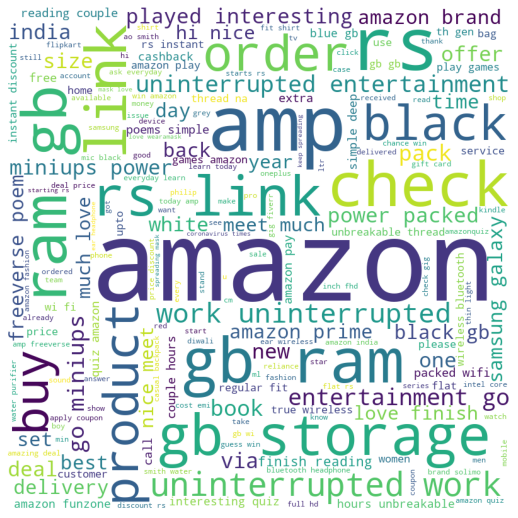

In [162]:
# WordCloud of Full(Amazon)
from wordcloud import WordCloud, STOPWORDS 
    
comment_words = '' 
stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in amazon_sentiment.tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

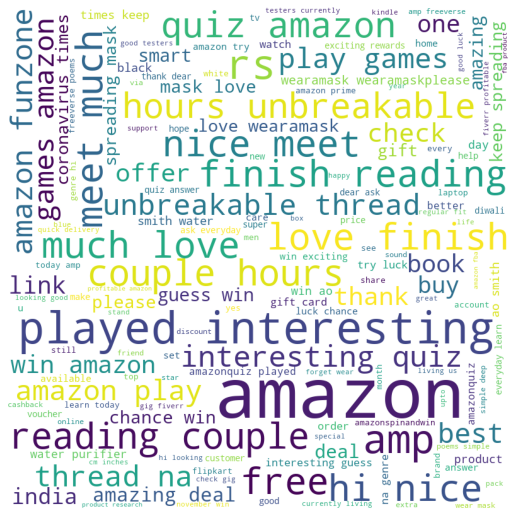

In [163]:
# WordCloud of "Positive" (Amazon)
comment_words = '' 
   
for val in amazon_sentiment[amazon_sentiment.sentiment=="Positive"].tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

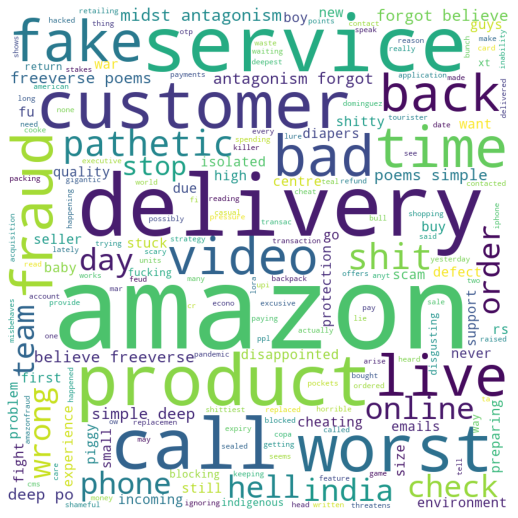

In [164]:
# WordCloud of "Negative" (Amazon)
comment_words = '' 
   
for val in amazon_sentiment[amazon_sentiment.sentiment=="Negative"].tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Snapdeal

In [129]:
df_snapdeal=pd.DataFrame(snapdeal_tweets,columns=["snapdeal"])
df_snapdeal.to_csv(r'C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Datascience ims 2\project 2\snapdeal_tweets.csv', index = False)
df_snapdeal=pd.read_csv(r'C:\Users\TOSHIBA\Documents\ESSENTIALS\Data Science ALL\Datascience ims 2\project 2\snapdeal_tweets.csv')

In [213]:
list_snpd=[]
for tweet in df_snapdeal.snapdeal:
    tweet= tweet.lower()
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet= re.sub(r'\W',' ',tweet)
    tweet= re.sub(r'[ய இர ந த வ ள ய ட ங க க ள வ க க ன பத ல வர ச ய]',' ',tweet)
    tweet=re.sub(r'\d',' ',tweet)
    tweet=re.sub(r'\s+[a-z]\s+',' ',tweet)
    tweet=re.sub(r"^[a-z]\s+"," ", tweet)
    tweet=tweet.strip()
    tweet=re.sub(r'\s+',' ',tweet)
    list_snpd.append(tweet)


In [214]:
import nltk
from nltk.corpus import stopwords

In [215]:
list_snpd1=[]
for i in list_snpd:
    words= nltk.word_tokenize(i)
    newwords=[x for x in words if x not in stopwords.words("english")]
    i=" ".join(newwords)
    i=i.strip()
    list_snpd1.append(i)
# print(list_snpd1)

In [216]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid_snpd = SentimentIntensityAnalyzer()

In [217]:
df_snpd= pd.DataFrame(list_snpd1)
df_snpd.columns=["tweets"]
df_snpd.head()

,tweets
0,end refused give finally also uninstalling
1,sensational apparel awaits welna perfect choic...
2,hi apologies experience please reach us via pr...
3,want return order
4,share suborder id


In [218]:

senti_snpd=[]
for i in df_snpd["tweets"]:
    score=sid_snpd.polarity_scores(i)
    if score['compound'] >= 0.5 : 
#         print("Positive") 
        senti_snpd.append("Positive")
  
    elif score['compound'] <= - 0.5 : 
#         print("Negative") 
        senti_snpd.append("Negative")
  
    else : 
#         print("Neutral")
        senti_snpd.append("Neutral")

In [219]:
Sentiment_snpd=pd.DataFrame(senti_snpd)
Sentiment_snpd.columns=["sentiment"]
Sentiment_snpd.head(10)

,sentiment
0,Neutral
1,Positive
2,Positive
3,Neutral
4,Neutral
5,Neutral
6,Neutral
7,Neutral
8,Positive
9,Neutral


In [168]:
snapdeal_sentiment=pd.concat([df_snpd,Sentiment_snpd], axis=1)
print(snapdeal_sentiment.shape)
snapdeal_sentiment.head()

(1041, 2)


,tweets,sentiment
0,end refused give finally also uninstalling,Neutral
1,sensational apparel awaits welna perfect choic...,Positive
2,hi apologies experience please reach us via pr...,Positive
3,want return order,Neutral
4,share suborder id,Neutral


In [221]:
index_drop2=snapdeal_sentiment[snapdeal_sentiment["tweets"]==""].index
snapdeal_sentiment.drop(index_drop2, inplace = True) 
snapdeal_sentiment.shape

(1026, 2)

In [222]:
snapdeal_sentiment.sentiment.value_counts()

Neutral     682
Negative    173
Positive    171
Name: sentiment, dtype: int64

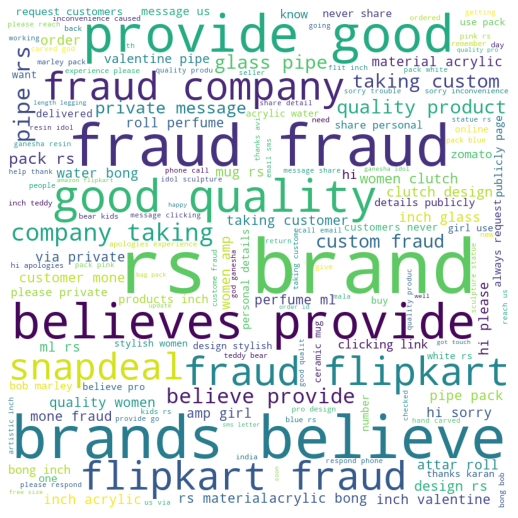

In [155]:
# WordCloud of Full(Snapdeal)
from wordcloud import WordCloud, STOPWORDS 
    
comment_words = '' 
stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in snapdeal_sentiment.tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

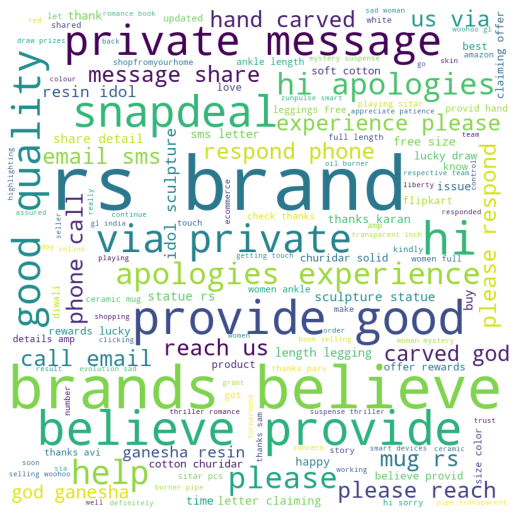

In [156]:
# WordCloud of "Positive" (Snapdeal)
comment_words = '' 
   
for val in snapdeal_sentiment[snapdeal_sentiment.sentiment=="Positive"].tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

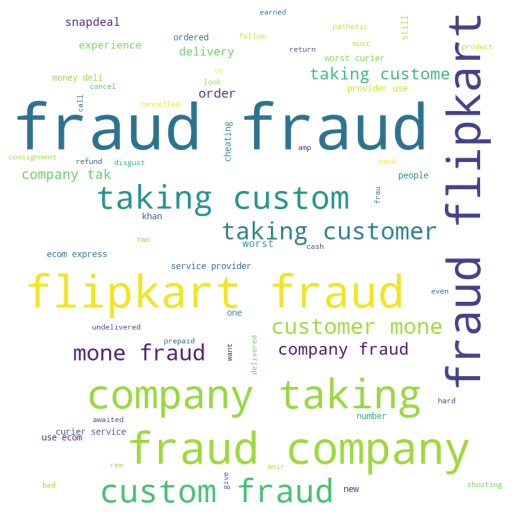

In [157]:
# WordCloud of "Negative" (Snapdeal)
comment_words = '' 
   
for val in snapdeal_sentiment[snapdeal_sentiment.sentiment=="Negative"].tweets: 
    tokens = val.split()       
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()